In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [145]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2

In [146]:
data = pd.read_csv("../input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data = data.drop(columns = 'Cabin',axis=0)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

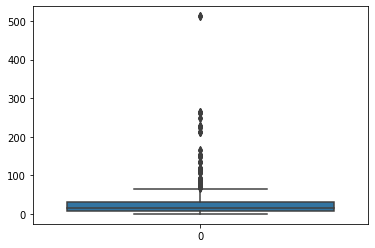

In [150]:
sns.boxplot(data = data['Fare'])

In [151]:
data.shape

(891, 11)

In [152]:
data = data.drop(data[data['Fare']>400].index)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

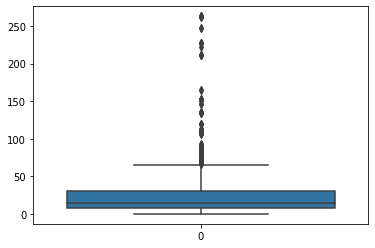

In [153]:
sns.boxplot(data = data['Fare'])

In [154]:
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])
Embarked_dict = {}
Embarked_encoded = data['Embarked'].unique()
Embarked_decoded = le.inverse_transform(Embarked_encoded)
for i in range(len(Embarked_encoded)):
    Embarked_dict.setdefault(Embarked_encoded[i],Embarked_decoded[i])

Embarked_dict,data.head()

({2: 'S', 0: 'C', 1: 'Q'},
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare  Embarked  
 0      0         A/5 21171   7.2500         2  
 1      0          PC 17599  71.2833         0  
 2      0  STON/O2. 3101282   7.9250         2  
 3      0            113803  53.1000         2  
 4      0            373450   8.05

In [155]:
data = data.drop(columns = ['Name', 'Ticket','PassengerId'],axis=0)
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,2,0,1
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,2,1,0
3,1,1,35.0,1,0,53.1000,2,1,0
4,0,3,35.0,0,0,8.0500,2,0,1


<AxesSubplot:>

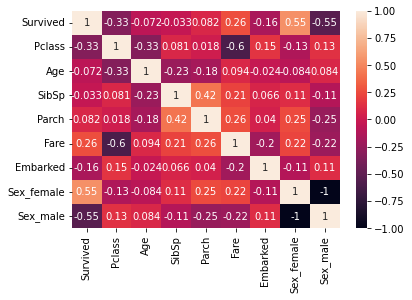

In [156]:
sns.heatmap(data.corr(),annot=True)

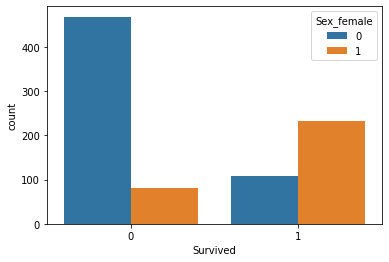

In [157]:
sns.countplot(x = 'Survived',data=data,hue='Sex_female');

In [158]:
features = data.iloc[:,1:]
target = data.iloc[:,0]

best_features = SelectKBest(score_func = chi2,k = 8)
fit = best_features.fit(features,target)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Column','Score'] 
featureScores.nlargest(8,'Score')

,Column,Score
4,Fare,3368.970070
6,Sex_female,171.353446
7,Sex_male,93.275876
0,Pclass,29.767659
1,Age,26.176688
3,Parch,10.212079
5,Embarked,9.234924
2,SibSp,2.298203


In [159]:
data = data.drop(columns = ['Parch', 'Embarked', 'SibSp'],axis=0)
data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


In [160]:
data['Survived'].value_counts()

0    549
1    339
Name: Survived, dtype: int64

In [161]:
features = data.iloc[:,1:].values
target = data.iloc[:,0].values
sc = StandardScaler()
features = sc.fit_transform(features)
features,target.shape

(array([[ 8.24122683e-01, -5.90208755e-01, -5.66959029e-01,
         -7.37799313e-01,  7.37799313e-01],
        [-1.57529024e+00,  6.39379507e-01,  9.89015696e-01,
          1.35538212e+00, -1.35538212e+00],
        [ 8.24122683e-01, -2.82811689e-01, -5.50556892e-01,
          1.35538212e+00, -1.35538212e+00],
        ...,
        [ 8.24122683e-01,  1.46278832e-03, -1.73307748e-01,
          1.35538212e+00, -1.35538212e+00],
        [-1.57529024e+00, -2.82811689e-01, -1.41462737e-02,
         -7.37799313e-01,  7.37799313e-01],
        [ 8.24122683e-01,  1.78283909e-01, -5.54809298e-01,
         -7.37799313e-01,  7.37799313e-01]]),
 (888,))

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


x_train,y_train = features, target,
classifier = KNeighborsClassifier()
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
GSCV = GridSearchCV(classifier,hyperparameters,cv = 10)
model = GSCV.fit(x_train,y_train)
print(model)
print('HIGHEST ACCURACY : ','{0:.2%}'.format(model.best_score_))
print('BEST PARAMETERS : ',model.best_params_)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})
HIGHEST ACCURACY :  83.00%
BEST PARAMETERS :  {'leaf_size': 13, 'n_neighbors': 4, 'p': 1}


In [163]:
estimator = KNeighborsClassifier(leaf_size=13, n_neighbors=4,p=1)
estimator.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=13, n_neighbors=4, p=1)

In [164]:
test = pd.read_csv("../input/titanic/test.csv")
test.shape,test.head()

((418, 11),
    PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  )

In [165]:
passenger_id = test['PassengerId']
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [166]:
test = test.drop(columns = ['Cabin', 'Name', 'Ticket', 'PassengerId', 'Parch', 'Embarked', 'SibSp'],axis=0)
test.shape

(418, 4)

In [167]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [168]:
test = pd.get_dummies(test)
test

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,34.50000,7.8292,0,1
1,3,47.00000,7.0000,1,0
2,2,62.00000,9.6875,0,1
3,3,27.00000,8.6625,0,1
4,3,22.00000,12.2875,1,0
...,...,...,...,...,...
413,3,30.27259,8.0500,0,1
414,1,39.00000,108.9000,1,0
415,3,38.50000,7.2500,0,1
416,3,30.27259,8.0500,0,1


In [169]:
test = sc.fit_transform(test.values)
test

array([[ 0.87348191,  0.3349926 , -0.49840706, -0.75592895,  0.75592895],
       [ 0.87348191,  1.32553003, -0.51327429,  1.32287566, -1.32287566],
       [-0.31581919,  2.51417495, -0.46508846, -0.75592895,  0.75592895],
       ...,
       [ 0.87348191,  0.65196458, -0.50879189, -0.75592895,  0.75592895],
       [ 0.87348191,  0.        , -0.4944482 , -0.75592895,  0.75592895],
       [ 0.87348191,  0.        , -0.23790598, -0.75592895,  0.75592895]])

In [170]:
test.shape

(418, 5)

In [171]:
prediction = estimator.predict(test)
submission = pd.DataFrame({'PassengerId':passenger_id,'Survived':prediction})
submission.to_csv('submission.csv',index = False)
submission['Survived'].value_counts()

0    291
1    127
Name: Survived, dtype: int64